Finally, we consider radiative exchange between two finite areas $A_i$ and $A_j$. The total energy leaving $A_i$ toward $A_j$ is

$$\int_{A_i} \int_{A_j} I(\mathbf{r}_i) \dfrac{\cos \theta_i,\cos \theta_j}{S^2}dA_j dA_i$$,

and the view factor follows as

$$ F_{A_i-A_j}=  \int_{A_i} \int_{A_j} I(\mathbf{r}_i) \dfrac{\cos \theta_i,\cos \theta_j}{S^2} dA_j dA_i \bigg{/} \pi \int_{A_i}I(\mathbf{r}_i) dA_i, $$

If we assume again that the intensity leabing $A_i$ does not vary accros the surface, the view factor reduces to

$$ F_{A_i-A_j}= \dfrac{1}{A_i} \int_{A_i} \int_{A_j} \dfrac{\cos \theta_i,\cos \theta_j}{\pi S^2} dA_j dA_i $$

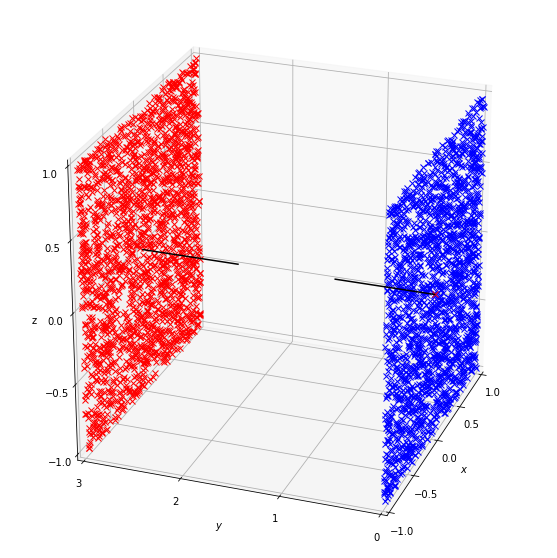

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

#Número de rayos/caminatas
n = int(2e3)

#Generar posiciones iniciales:
#Tamaño

Lx1 = 1
Ly1 = 1

Lx2 = 1
Ly2 = 1

#Disposición:

vn1 = [0,1,0]    #vector normal al plano 1.
xo1 = [0,0,0]    #posición central del plano 1.

vn2 = [0,-1,0]   #vector normal al plano 2.
xo2 = [0,3,0]    # posición central del plano 2.

#Vectores auxiliares:

x1 = np.zeros((3,n))
x2 = np.zeros((3,n))

#Normalizar vectores normales:
vn1 = vn1/np.linalg.norm(vn1)
vn2 = vn2/np.linalg.norm(vn2)

#Orientación de lado recto de planos.
vnr = [1,0,0]  #orientación del borde

#Vectores auxiliares de plano 1
vx1 = np.cross(vnr,vn1)
vx1 = vx1/np.linalg.norm(vx1)
vy1 = np.cross(vx1,vn1)
vy1 = vy1/np.linalg.norm(vy1)

#Vectores auxiliares de plano 2
vx2 = np.cross(vnr,vn2)
vx2 = vx2/np.linalg.norm(vx2)
vy2 = np.cross(vx2,vn1)
vy2 = vy2/np.linalg.norm(vy2)

#Posiciones iniciales y finales

#Placa azul
for i in range(1,n):
    rx = vx1*Lx1*(2*np.random.uniform(0,1)-1)
    ry = vy1*Ly1*(2*np.random.uniform(0,1)-1)
    x1[:, i] = xo1+rx+ry
    
#Placa roja
for i in range(1,n):
    rx = vx2*Lx2*(2*np.random.uniform(0,1)-1)
    ry = vy2*Ly2*(2*np.random.uniform(0,1)-1)
    x2[:, i] = xo2+rx+ry
    
#Visualizar puntos
fig = plt.figure(figsize=(10,10))
ax  = plt.axes(projection='3d')
ax.plot3D(x1[0,:],x1[1,:],x1[2,:], 'xb')
ax.plot3D(x2[0,:],x2[1,:],x2[2,:], 'xr')

aux1a = [xo1[0],xo1[0]+vn1[0]]
aux2a = [xo1[1],xo1[1]+vn1[1]]
aux3a = [xo1[2],xo1[2]+vn1[2]]

aux1b = [xo2[0],xo2[0]+vn2[0]]
aux2b = [xo2[1],xo2[1]+vn2[1]]
aux3b = [xo2[2],xo2[2]+vn2[2]]

ax.plot3D(aux1a,aux2a,aux3a,'k-')
ax.plot3D(aux1b,aux2b,aux3b,'k-')
ax.set_xlim(-1,1)
ax.set_xlabel("$x$")
ax.set_xticks([-1,-0.5,0,0.5,1])
ax.set_ylim(0,3)
ax.set_ylabel("$y$")
ax.set_yticks([0,1,2,3])
ax.set_zlim(-1,1)
ax.set_zlabel("z")
ax.set_zticks([-1,-0.5,0,0.5,1])
ax.set_box_aspect(aspect = (1,1,1))
ax.view_init(25, -160)
plt.show()



In [2]:
Ai = Lx1*Ly1
Af = Lx2*Ly2

F = 0

for i in range(1,n):
    for j in range(1,n):
        
        #Vector desplazamiento
        s = x2[:,i]-x1[:,j]
        S = np.linalg.norm(s)  #Magnitud
        s = s/S                #Dirección
        
        cosi = np.dot(s,vn1)
        cosf = np.dot(-s,vn2)
        
        F = F + (cosi*cosf/(np.pi*S**2))

F = 100*F*(Ai/n)*(Af/n)
print("The view factor F is : {}".format(F))

The view factor F is : 2.7600582480076197
